In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [60]:
# ablation_directory = "/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_CCLE_PD_0325901_retrain/CCLE_PD_0325901_stability/varying_sample_row_n"
# combined_df = pd.DataFrame()
# split_seeds = [1,2,3]
# for split_seed in split_seeds:
#     df = pd.read_csv(os.path.join(ablation_directory, f"split_seed_{split_seed}/results.csv"))
#     combined_df = pd.concat([combined_df, df], ignore_index=True)

# ccle_combined_df = combined_df.groupby("fi")[["train_size", "test_size", "num_features", 
#                                          "avg_3_features_train", "avg_3_features_test", 
#                                          "avg_5_features_train", "avg_5_features_test", 
#                                          "avg_10_features_train", "avg_10_features_test"]].mean().reset_index()
# ccle_combined_df["dataset"] = "CCLE"

# ablation_directory = "/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_performance_retrain/performance_stability/varying_sample_row_n"
# combined_df = pd.DataFrame()
# split_seeds = [1,2,3]
# for split_seed in split_seeds:
#     df = pd.read_csv(os.path.join(ablation_directory, f"split_seed_{split_seed}/results.csv"))
#     combined_df = pd.concat([combined_df, df], ignore_index=True)

# performance_combined_df = combined_df.groupby("fi")[["train_size", "test_size", "num_features", 
#                                          "avg_3_features_train", "avg_3_features_test", 
#                                          "avg_5_features_train", "avg_5_features_test", 
#                                          "avg_10_features_train", "avg_10_features_test"]].mean().reset_index()
# performance_combined_df["dataset"] = "Performance"

# ablation_directory = "/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_parkinsons_retrain/parkinsons_stability/varying_sample_row_n"
# combined_df = pd.DataFrame()
# split_seeds = [1,2,3]
# for split_seed in split_seeds:
#     df = pd.read_csv(os.path.join(ablation_directory, f"split_seed_{split_seed}/results.csv"))
#     combined_df = pd.concat([combined_df, df], ignore_index=True)

# parkinsons_combined_df = combined_df.groupby("fi")[["train_size", "test_size", "num_features", 
#                                          "avg_3_features_train", "avg_3_features_test", 
#                                          "avg_5_features_train", "avg_5_features_test", 
#                                          "avg_10_features_train", "avg_10_features_test"]].mean().reset_index()
# parkinsons_combined_df["dataset"] = "Parkinsons"

# ablation_directory = "/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_temperature/temperature_stability/varying_sample_row_n"
# combined_df = pd.DataFrame()
# split_seeds = [1,2,3]
# for split_seed in split_seeds:
#     df = pd.read_csv(os.path.join(ablation_directory, f"split_seed_{split_seed}/results.csv"))
#     combined_df = pd.concat([combined_df, df], ignore_index=True)

# temperature_combined_df = combined_df.groupby("fi")[["train_size", "test_size", "num_features", 
#                                         "avg_5_features_train", "avg_5_features_test", "avg_5_features_all",
#                                         "avg_10_features_train", "avg_10_features_test", "avg_10_features_all",
#                                         "avg_20_features_train", "avg_20_features_test", "avg_20_features_all",
#                                         "avg_40_features_train", "avg_40_features_test", "avg_40_features_all",
#                                          ]].mean().reset_index()
# temperature_combined_df["dataset"] = "Temperature"

# combined_df_all = pd.concat([ccle_combined_df, performance_combined_df, parkinsons_combined_df, temperature_combined_df], ignore_index=True)
# combined_df_all = combined_df_all[combined_df_all["fi"] != "Random"] 

In [61]:
data = "CCLE_PD_0325901" #"parkinsons"
ablation_directory = f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_{data}/{data}_stability/varying_sample_row_n"
combined_df = pd.DataFrame()
split_seeds = [1,2,3]
for split_seed in split_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"split_seed_{split_seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

combined_df = combined_df.groupby("fi")[["train_size", "test_size", "num_features", 
                                        "avg_5_features_train", "avg_5_features_test", "avg_5_features_all",
                                        "avg_10_features_train", "avg_10_features_test", "avg_10_features_all",
                                        "avg_20_features_train", "avg_20_features_test", "avg_20_features_all",
                                        "avg_40_features_train", "avg_40_features_test", "avg_40_features_all",
                                         ]].mean().reset_index()

In [62]:
methods = [
        # 'Random',
        'LIME_RF', 
       'Local_MDI+_Alo_fit_on_all_ranking_RFPlus',
       'Local_MDI+_MDI_fit_on_all_ranking_RFPlus',
       'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus',
       'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus',
       'TreeSHAP_RF'
       ]
color_map = {
    'Random': 'gray',  # Assign a default neutral color for Random
    'LIME_RF': '#71BEB7',
    'Local_MDI+_Alo_fit_on_all_ranking_RFPlus': '#FF5733',  # Example bright color
    'Local_MDI+_MDI_fit_on_all_ranking_RFPlus': 'black',  # Example greenish color
    'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus': '#3357FF',  # Example blueish color
    'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus': '#FF33A1',  # Example pinkish color
    'TreeSHAP_RF': 'orange'
}
# method_names = {'TreeSHAP_RF': 'SHAP', 'Local_MDI+_fit_on_all_ranking_RFPlus': "LMDI+", 'LIME_RF': 'LIME'}

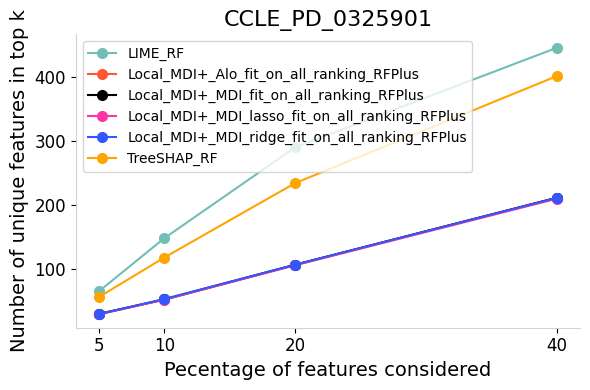

In [63]:
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Increase data marker size
marker_size = 7
df = combined_df
df = df[df['fi'].isin(methods)]

x = [5,10,20,40]
fig, ax = plt.subplots(figsize=(6, 4))

for index, row in df.iterrows():
    y = [row['avg_5_features_all'], row['avg_10_features_all'], row['avg_20_features_all'], row['avg_40_features_all']]
    ax.plot(x, y, '-o', label=row['fi'], color=color_map[row['fi']], markersize=7)

ax.set_xlabel('Pecentage of features considered', fontsize=14)
ax.set_ylabel('Number of unique features in top k', fontsize=14)
ax.set_title(data, fontsize=16)
ax.legend(fontsize=10, title_fontsize=12)
ax.set_xticks(x)  
ax.set_xticklabels(x)  

plt.tight_layout()
# plt.savefig('performance_dataset_stability.png')
plt.show()

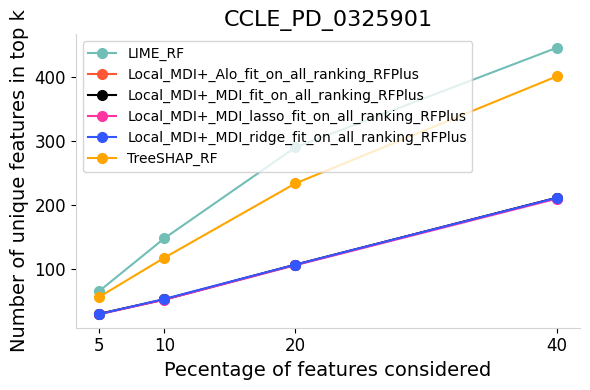

In [64]:
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Increase data marker size
marker_size = 7
df = combined_df
df = df[df['fi'].isin(methods)]

x = [5,10,20,40]
fig, ax = plt.subplots(figsize=(6, 4))

for index, row in df.iterrows():
    y = [row['avg_5_features_train'], row['avg_10_features_train'], row['avg_20_features_train'], row['avg_40_features_train']]
    ax.plot(x, y, '-o', label=row['fi'], color=color_map[row['fi']], markersize=7)

ax.set_xlabel('Pecentage of features considered', fontsize=14)
ax.set_ylabel('Number of unique features in top k', fontsize=14)
ax.set_title(data, fontsize=16)
ax.legend(fontsize=10, title_fontsize=12)
ax.set_xticks(x)  
ax.set_xticklabels(x)  

plt.tight_layout()
# plt.savefig('performance_dataset_stability.png')
plt.show()

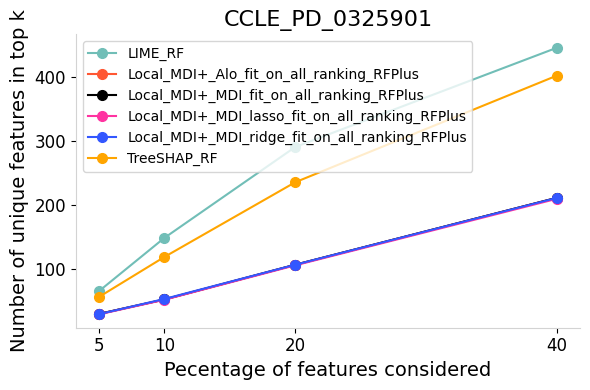

In [65]:
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Increase data marker size
marker_size = 7
df = combined_df
df = df[df['fi'].isin(methods)]

x = [5,10,20,40]
fig, ax = plt.subplots(figsize=(6, 4))

for index, row in df.iterrows():
    y = [row['avg_5_features_test'], row['avg_10_features_test'], row['avg_20_features_test'], row['avg_40_features_test']]
    ax.plot(x, y, '-o', label=row['fi'], color=color_map[row['fi']], markersize=7)

ax.set_xlabel('Pecentage of features considered', fontsize=14)
ax.set_ylabel('Number of unique features in top k', fontsize=14)
ax.set_title(data, fontsize=16)
ax.legend(fontsize=10, title_fontsize=12)
ax.set_xticks(x)  
ax.set_xticklabels(x)  

plt.tight_layout()
# plt.savefig('performance_dataset_stability.png')
plt.show()

In [66]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from matplotlib.ticker import MaxNLocator
# palette = {
#     'LIME_RF': '#1f77b4',  # Bold blue
#     'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus': '#ff7f0e',  # Vibrant orange
#     'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus': '#2ca02c',  # Bright green
#     'Local_MDI+_fit_on_oob_ranking_RFPlus': '#d62728',  # Bright red
#     'Local_MDI+_fit_on_all_ranking_RFPlus': '#e377c2',  # Pink
#     'TreeSHAP_RF': '#9467bd',  # Bold purple
#     # 'Random': '#ad494a',  # warm red
# }

# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 4))  
# sns.scatterplot(
#     data=combined_df_all,
#     x='avg_3_features_train',
#     y='dataset',
#     hue='fi',
#     palette=palette,
#     s=100  # Size of the dots
# )

# # Customize the legend
# plt.legend(title='Method', loc='lower right')
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.xlabel('Number of Distinct Features in Top 3 Across Training-Test Splits')
# plt.ylabel('Dataset')

# plt.yticks(fontsize=10)  
# plt.tight_layout()
# plt.show()

In [67]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# palette = {
#     'LIME_RF': '#1f77b4',  # Bold blue
#     'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus': '#ff7f0e',  # Vibrant orange
#     'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus': '#2ca02c',  # Bright green
#     'Local_MDI+_fit_on_oob_ranking_RFPlus': '#d62728',  # Bright red
#     'Local_MDI+_fit_on_all_ranking_RFPlus': '#e377c2',  # Pink
#     'TreeSHAP_RF': '#9467bd',  # Bold purple
#     # 'Random': '#ad494a',  # warm red
# }

# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 4))  
# sns.scatterplot(
#     data=combined_df_all,
#     x='avg_5_features_train',
#     y='dataset',
#     hue='fi',
#     palette=palette,
#     s=100  # Size of the dots
# )

# # Customize the legend
# plt.legend(title='Method', loc='lower right')
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.xlabel('Number of Distinct Features in Top 5 Across Training-Test Splits')
# plt.ylabel('Dataset')

# plt.yticks(fontsize=10)  
# plt.tight_layout()
# plt.show()

In [68]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# palette = {
#     'LIME_RF': '#1f77b4',  # Bold blue
#     'Local_MDI+_fit_on_all_l2_norm_ranking_RFPlus': '#ff7f0e',  # Vibrant orange
#     'Local_MDI+_fit_on_oob_l2_norm_ranking_RFPlus': '#2ca02c',  # Bright green
#     'Local_MDI+_fit_on_oob_ranking_RFPlus': '#d62728',  # Bright red
#     'Local_MDI+_fit_on_all_ranking_RFPlus': '#e377c2',  # Pink
#     'TreeSHAP_RF': '#9467bd',  # Bold purple
#     # 'Random': '#ad494a',  # warm red
# }

# sns.set(style="whitegrid")
# plt.figure(figsize=(10, 4))  
# sns.scatterplot(
#     data=combined_df_all,
#     x='avg_10_features_train',
#     y='dataset',
#     hue='fi',
#     palette=palette,
#     s=100  # Size of the dots
# )

# # Customize the legend
# plt.legend(title='Method', loc='lower right')
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# plt.xlabel('Number of Distinct Features in Top 10 Across Training-Test Splits')
# plt.ylabel('Dataset')

# plt.yticks(fontsize=10)  
# plt.tight_layout()
# plt.show()